# OGY control of our Duffing Oscillator

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import *
from scipy.integrate import odeint
from control import acker

### No Control

In [24]:
#Parameters

b = 0.125
g = 0.3
omega = 1

# no. poincare points:
nu = 1
# no. data points per cycle
dens = 3000

#Integration of trajectory

def f(r,t):
    x = r[0]
    y = r[1]
    z = r[2] 
    gvar = r[3]
    drdt = np.array([ y, - 2*b*y + x - x**3 + gvar*cos(z)  , omega,0])
    return drdt

tvals = np.linspace(0,2*pi,dens)

def p(r):
    temp = odeint(f,r,tvals)[-1]
    return temp

# r is intial point, n is number of iterations
def nocontrol(r,n):
    a = []
    temp = r
    for i in range(1,n,1):
        a.append(temp)
        temp = p(temp)
    return a


In [25]:
r0 = np.array([0,0,0,g])
n = 1000


In [26]:
traj1 = nocontrol(r0,n)

In [27]:
traj1x, traj1y = [], []
for i in range(0,len(traj1),1):
    traj1x.append(traj1[i][0])
    traj1y.append(traj1[i][1])

#### Plot of x for Duffing oscillator with no control

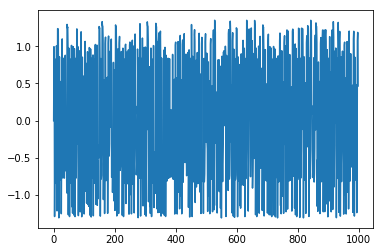

In [28]:
plt.plot(traj1x)
plt.show()

### Control System

In [29]:
A = [[-3.928861781731693,-4.992392085474836],
     [-3.24230845140935,-4.172901887729245 ]]


#### B

In [30]:
B = [[-8.67170099928552],
     [-6.834277477388746]]

In [31]:
# eigenvalues of A

l1 = np.linalg.eigvals(A)[0]
l2 = np.linalg.eigvals(A)[1]

# desired eigenvalues

a1 = 0
a2 = 0
if abs(l1) < 1:
    a1 = l1
if abs(l2) < 1:
    a2 = l2

#control package ackermann formula

L = [a1,a2]
Ktemp = acker(A,B,L)
K = np.array([Ktemp[0,0],Ktemp[0,1]])
          


#### Fixed point

In [32]:
fixed = np.array([0.12900567, 0.19367941])

#### Max pertubation of parameter

In [33]:
maxpert = 0.1

In [34]:
def control(z,n):
    x = z[0]
    y = z[1]
    a = [np.array([x,y,0,g])]
    for i in range(0,n,1):
        x, y = a[i][0], a[i][1]
        state = np.array([x,y])
        pert = state - fixed
        dgtemp = - np.dot(K,pert)
        dg = 0
        if abs(dgtemp) < maxpert*g:
            dg = dgtemp
        r0temp = np.array([x,y,0,g + dg])
        rtemp = odeint(f,r0temp,tvals)[-1]
        a.append(rtemp)
    return a

In [35]:
#initial conditions
r0 = [0.2,0]

rvals = control(np.array([r0[0],r0[1]]),1000)

In [36]:
xvals, yvals, dgvals = [],[],[]
for i in range(0,len(rvals),1):
    xvals.append(rvals[i][0])
    yvals.append(rvals[i][1])
    dgvals.append(rvals[i][3] - g)


#### x control values

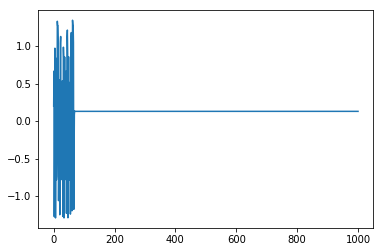

In [37]:
plt.plot(xvals)
plt.show()

#### y control values 

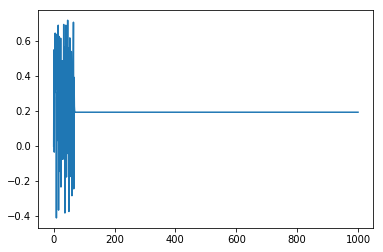

In [38]:
plt.plot(yvals)
plt.show()

#### dF values

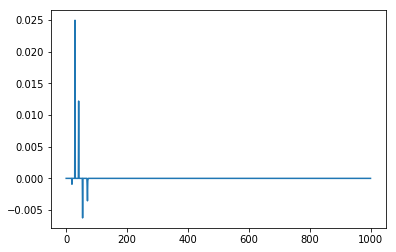

In [39]:
plt.plot(dgvals)
plt.show()

In [40]:
print(A)

[[-3.928861781731693, -4.992392085474836], [-3.24230845140935, -4.172901887729245]]


In [41]:
print(B)

[[-8.67170099928552], [-6.834277477388746]]


In [42]:
print(fixed)

[ 0.12900567  0.19367941]
